Project (Linear Regression)

Content                 
Columns                          
age: age of primary beneficiary                 
sex: insurance contractor gender, female, male                  
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,             
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9                      
children: Number of children covered by health insurance / Number of dependents                     
smoker: Smoking                  
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.                        
charges: Individual medical costs billed by health insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Importing the dataset
raw_data = pd.read_csv('insurance.csv')

In [3]:
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
raw_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
raw_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

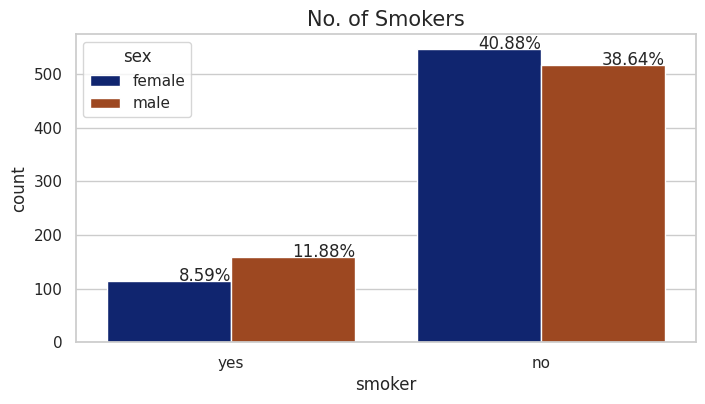

In [7]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,4))
total = float(len(raw_data))
ax = sns.countplot(x='smoker',hue='sex',data=raw_data,palette='dark')
plt.title('No. of Smokers',fontsize=15)

for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage,(x,y),ha='right')
plt.show()

In [8]:
# adding a column named age range in this dataset
# pd.cut()function is used to separate the array elements into different bins
age_bins = [18,30,40,50,60,70]
age = pd.cut(raw_data.age,age_bins,right=False)
age = pd.DataFrame(age,)
age.head()

,age
0,"[18, 30)"
1,"[18, 30)"
2,"[18, 30)"
3,"[30, 40)"
4,"[30, 40)"


In [9]:
age = age.rename(columns={'age':'age_range'})

In [10]:
raw_data = pd.concat([raw_data,age],axis=1)

In [11]:
raw_data.head()

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,"[18, 30)"
1,18,male,33.770,1,no,southeast,1725.55230,"[18, 30)"
2,28,male,33.000,3,no,southeast,4449.46200,"[18, 30)"
3,33,male,22.705,0,no,northwest,21984.47061,"[30, 40)"
4,32,male,28.880,0,no,northwest,3866.85520,"[30, 40)"


In [12]:
raw_data.age_range.value_counts()

[18, 30)    417
[40, 50)    279
[50, 60)    271
[30, 40)    257
[60, 70)    114
Name: age_range, dtype: int64

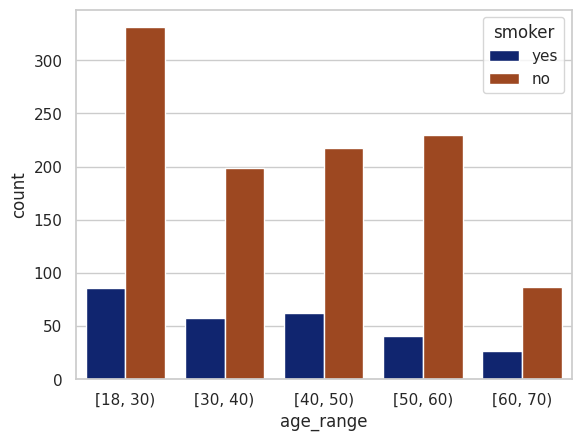

In [14]:
sns.countplot(x='age_range',hue='smoker',data=raw_data,palette='dark')
plt.show()

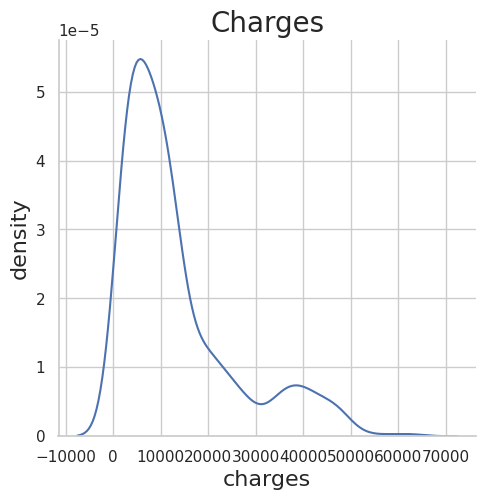

In [21]:
sns.displot(x='charges',data=raw_data,kind='kde')
plt.title('Charges',fontsize=20)
plt.xlabel('charges',fontsize=16)
plt.ylabel('density',fontsize=16)
plt.show()

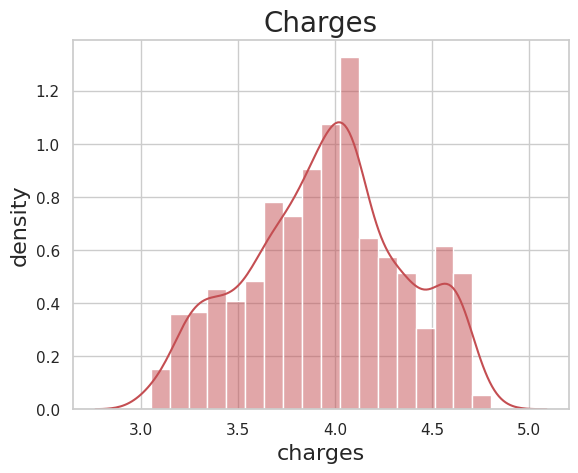

In [44]:
sns.histplot((np.log10(raw_data['charges'])),kde=True,stat='density',kde_kws=dict(cut=3),color='r')
plt.title('Charges',fontsize=20)
plt.xlabel('charges',fontsize=16)
plt.ylabel('density',fontsize=16)
plt.show()

In [45]:
raw_data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

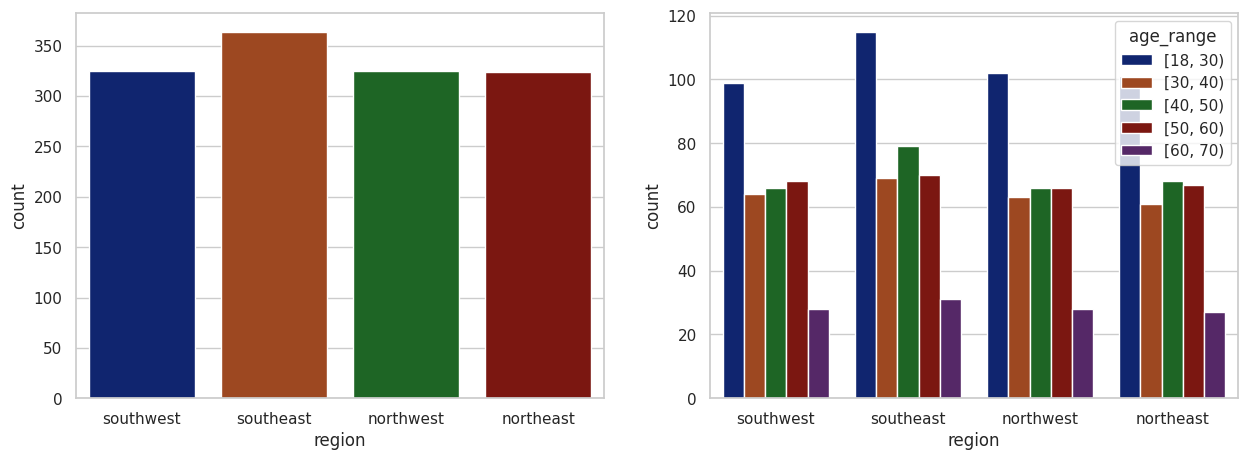

In [52]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='region',data=raw_data,palette='dark')

plt.subplot(1,2,2)
sns.countplot(x='region',hue='age_range',data=raw_data,palette='dark')
plt.show()

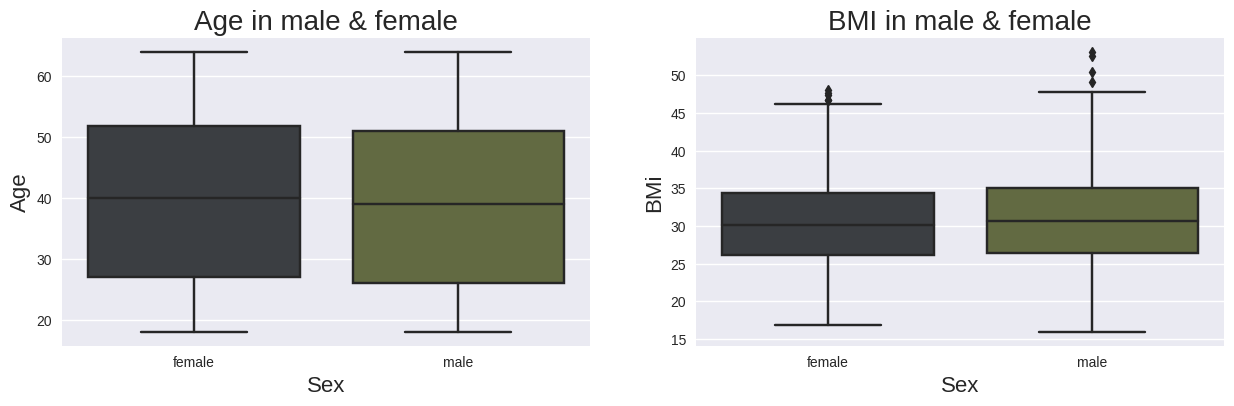

In [60]:
pb_color = ['#3A3E43','#66713B']
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x=raw_data['sex'],y=raw_data['age'],palette=pb_color)
plt.title('Age in male & female', fontsize=20)
plt.xlabel('Sex', fontsize=16)
plt.ylabel('Age', fontsize=16)


plt.subplot(1,2,2)
sns.boxplot(x=raw_data['sex'],y=raw_data['bmi'],palette=pb_color)
plt.title('BMI in male & female', fontsize=20)
plt.xlabel('Sex', fontsize=16)
plt.ylabel('BMi', fontsize=16)
plt.show()

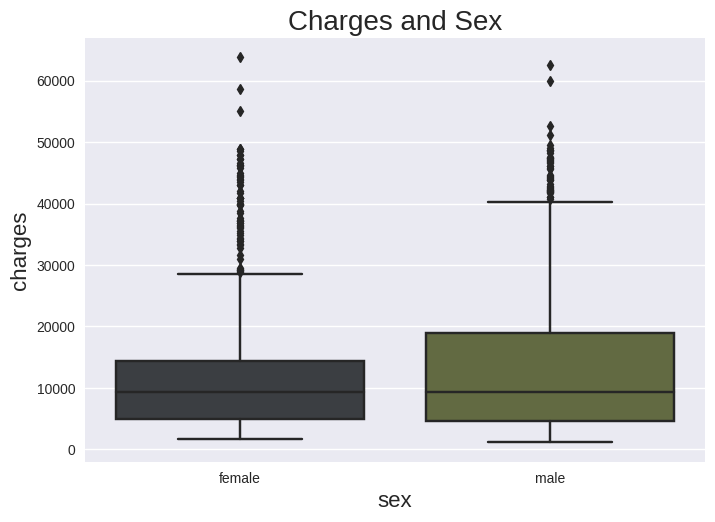

In [64]:
ax = sns.boxplot(x=raw_data['sex'],y=raw_data['charges'],palette=pb_color)
plt.title('Charges and Sex',fontsize=20)
plt.xlabel('sex',fontsize=16)
plt.ylabel('charges',fontsize=16)
plt.show()

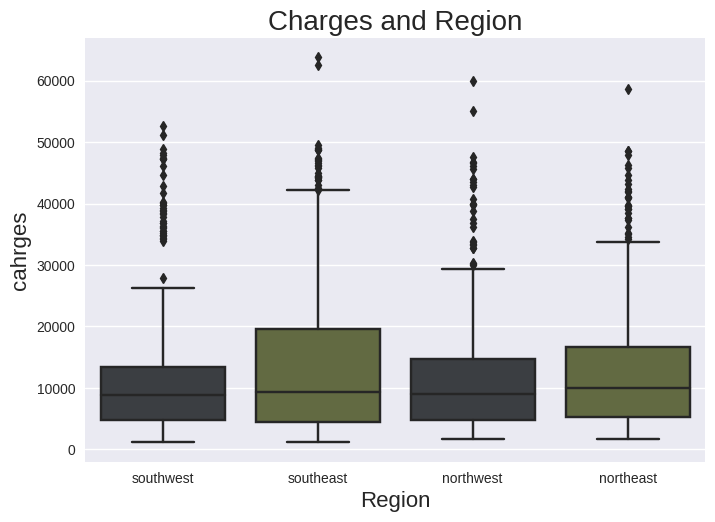

In [67]:
ax = sns.boxplot(x=raw_data['region'],y=raw_data['charges'],palette=pb_color)
plt.title('Charges and Region',fontsize=20)
plt.xlabel('Region',fontsize=16)
plt.ylabel('cahrges',fontsize=16)
plt.show()

<ipython-input-74-d372089ad1a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = raw_data.corr()


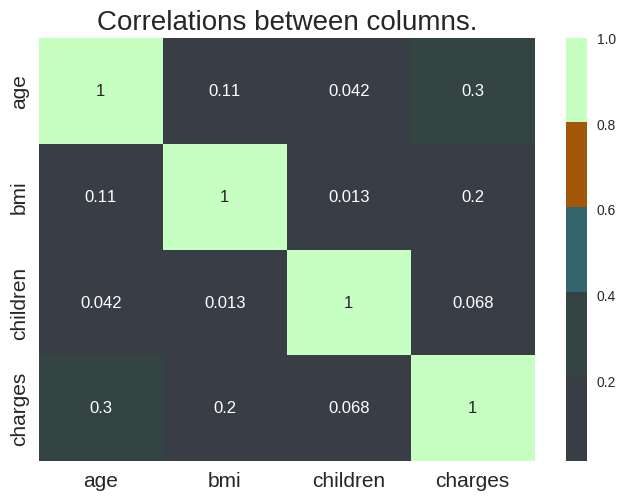

In [74]:
corr = raw_data.corr()
sns.heatmap(corr,annot=True,cmap=['#393E46','#334443','#34656D','#A35709','#C6FFC1'])
plt.title('Correlations between columns.', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

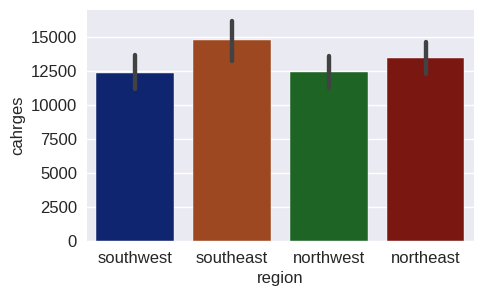

In [82]:
plt.figure(figsize=(5,3))
sns.barplot(x=raw_data['region'],y=raw_data['charges'],palette='dark')
plt.xlabel('region',fontsize=12)
plt.ylabel('cahrges',fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [87]:
temp = raw_data.groupby(['region'])[['charges']].sum().reset_index().sort_values(by='charges',ascending=True)
temp

,region,charges
3,southwest,4.012755e+06
1,northwest,4.035712e+06
0,northeast,4.343669e+06
2,southeast,5.363690e+06


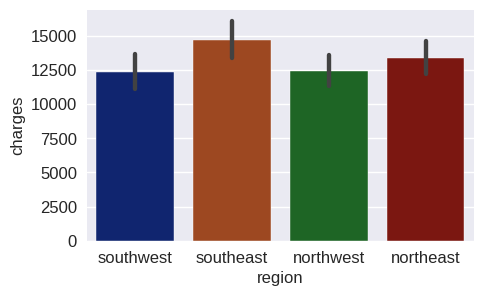

In [89]:
plt.figure(figsize=(5,3))
sns.barplot(x=raw_data['region'],y=raw_data['charges'],data=temp,palette='dark')
plt.xlabel('region',fontsize=12)
plt.ylabel('charges',fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [94]:
raw_data.drop('age_range',axis=1,inplace=True)

In [95]:
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


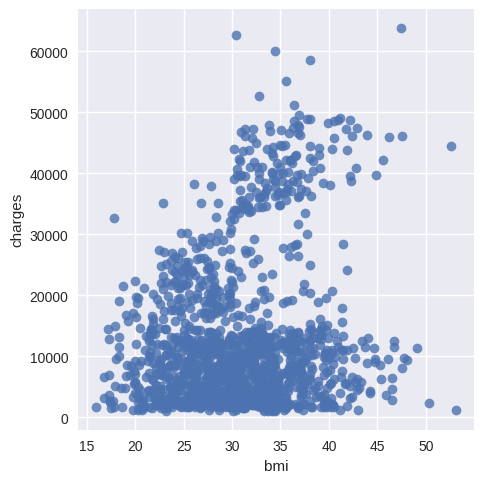

In [108]:
sns.lmplot(x='bmi',y='charges',data=raw_data,fit_reg=False)

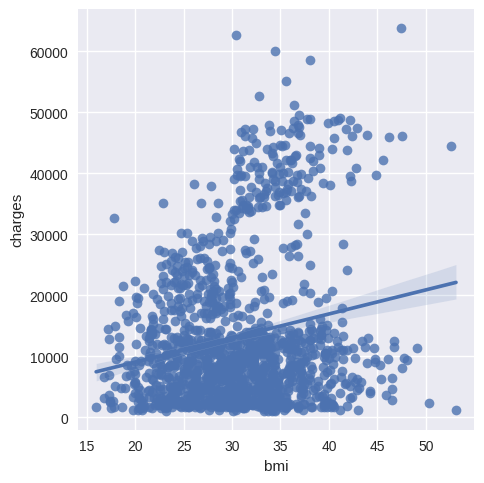

In [110]:
sns.lmplot(x='bmi',y='charges',data=raw_data)

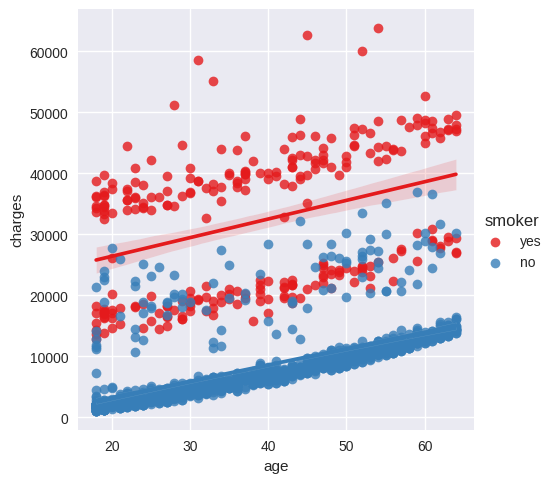

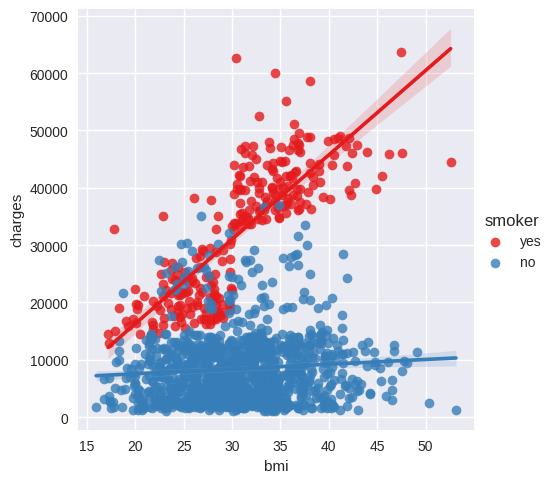

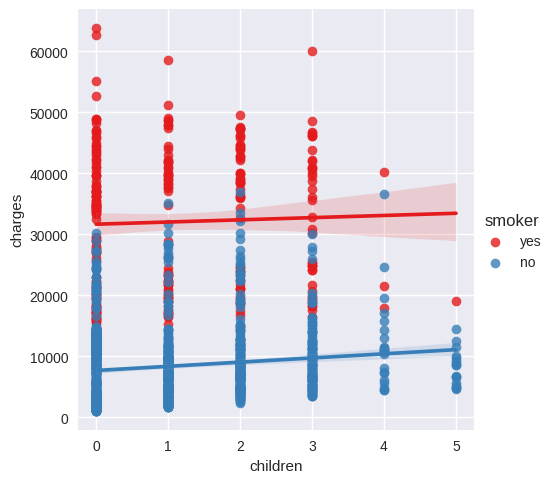

In [105]:
ax = sns.lmplot(x='age',y='charges',data=raw_data,hue='smoker',palette='Set1')
ax = sns.lmplot(x='bmi',y='charges',data=raw_data,hue='smoker',palette='Set1')
ax = sns.lmplot(x='children',y='charges',data=raw_data,hue='smoker',palette='Set1')

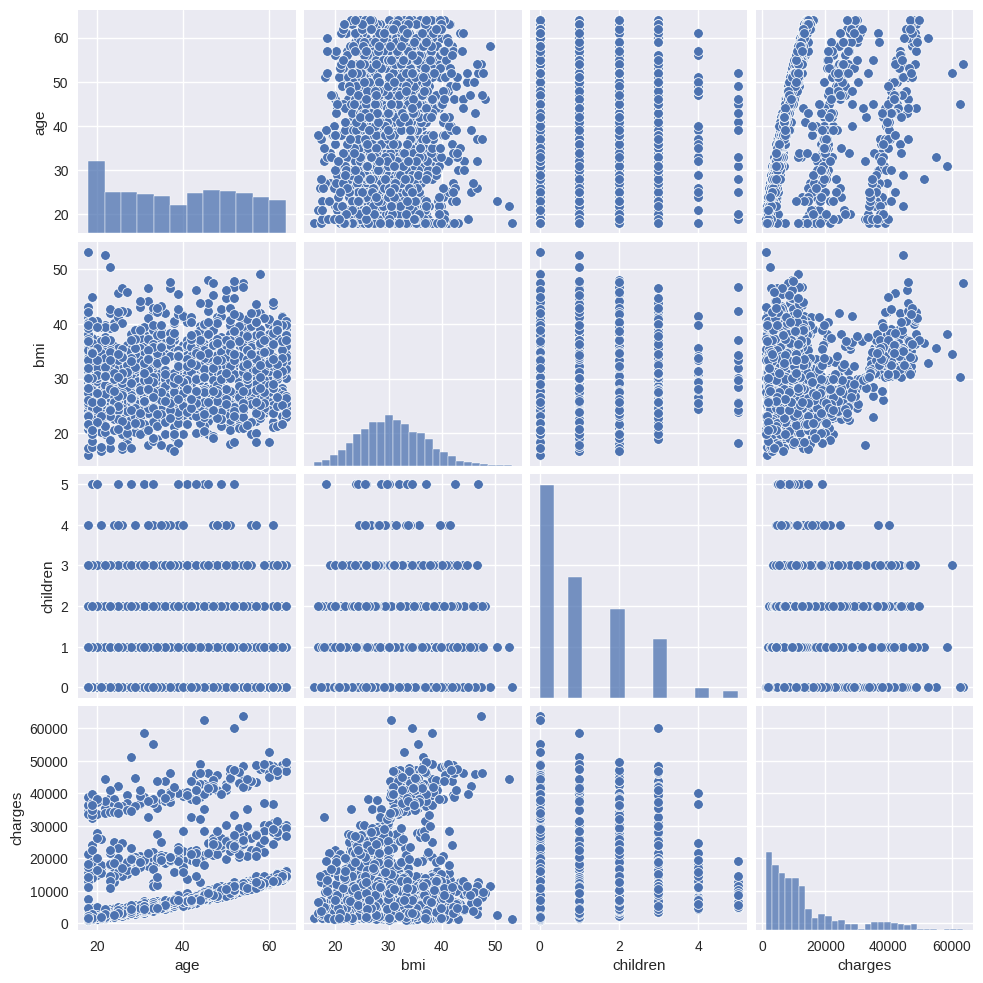

In [111]:
sns.pairplot(raw_data)
plt.show()

In [112]:
# Changing categorical column into numerical
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
raw_data.sex = label.fit_transform(raw_data.sex)
raw_data.region = label.fit_transform(raw_data.region)
raw_data.smoker = label.fit_transform(raw_data.smoker)
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Build OLS Model

In [113]:
import statsmodels.api as sm

In [114]:
x = raw_data.drop(['charges'],axis=1)
y = raw_data['charges']

In [116]:
x = x.drop(columns=['sex'])

In [117]:
X = sm.add_constant(x)

In [118]:
model = sm.OLS(y,X).fit()

In [119]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     802.2
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:11:25   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.187e+04    945.876    -12.546      0.000   -1.37e+04      -1e+04
age          257.4050     11.878     21.670      0.000     234.103     280.707
bmi          332.0420     27.681     11.995      0.000     277.739     386.345
children     478.4405    137.580      3.478      0.001     208.543     748.338
smoker      2.381e+04    410.543     57.992      0.000     2.3e+04    2.46e+04
region      -353.4491    151.878     -2.327      0.020    -651.395     -55.504
==============================================================================
Omnibus:                      299.380   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              715.644
Skew:                           1.208   Prob(JB):                    3.98e-156
Kurtosis:                       5.646   Cond. No.                         293.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Build Linear Regression model

In [120]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.33, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
y_pred = Lin_reg.predict(x_test)

print('Constant is =' ,Lin_reg.intercept_)
print("Intercept of variables are = ",Lin_reg.coef_)
print("Coefficient of determination (r^2) = ",Lin_reg.score(x_test, y_test))

Constant is = -11811.182899607798
Intercept of variables are =  [  258.35999009   322.46400799   555.50883132 23281.14846988
  -261.67304394]
Coefficient of determination (r^2) =  0.7873275952717829


In [121]:
temp_2 = {'True Value': y_test, 'Predicted Value': y_pred}
df = pd.DataFrame(data=temp_2)
df

,True Value,Predicted Value
578,9724.53000,11132.439326
610,8547.69130,9834.667293
569,45702.02235,37801.342197
1034,12950.07120,16063.272079
198,9644.25250,6923.978895
...,...,...
117,19107.77960,28004.212410
520,25656.57526,9929.431863
422,39125.33225,32928.631867
294,3906.12700,4171.359629
